In [6]:
import numpy as np
from matplotlib import pyplot as plt

from os import listdir
from os.path import join
from scipy.io import wavfile

import sys
import math

import librosa
import librosa.display
from librosa.effects import trim

import tensorflow as tf
import tensorflow_io as tfio
# from tensorflow.keras.layers.experimental import preprocessing
# from tensorflow.keras import layers
# from tensorflow.keras import models
# from keras.optimizers import Adam

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import itertools  

import IPython.display as ipd
from IPython.core.display import display

/tmp/ipykernel_70069/3087851986.py:29: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display


# Audio Handling Functions

In [7]:
# by default anything below 10 db is considered as silence
def remove_silence(sample, sr= 8000, top_db = 10):
    """This function removes trailing and leading silence periods of audio signals.
    """
    # Trim the beginning and ending silence
    yt, _ = trim(sample, top_db= top_db)
    return yt

# def pad_trunc(aud, max_ms):
#     sig, sr = aud
#     num_rows, sig_len = sig.shape
#     max_len = sr//1000 * max_ms

#     if (sig_len > max_len):
#       # Truncate the signal to the given length
#       sig = sig[:,:max_len]

#     elif (sig_len < max_len):
#       # Length of padding to add at the beginning and end of the signal
#       pad_begin_len = random.randint(0, max_len - sig_len)
#       pad_end_len = max_len - sig_len - pad_begin_len

#       # Pad with 0s
#       pad_begin = torch.zeros((num_rows, pad_begin_len))
#       pad_end = torch.zeros((num_rows, pad_end_len))

#       sig = torch.cat((pad_begin, sig, pad_end), 1)
      
#     return (sig, sr)

# def stft_spectrogram(waveform):
#   # Padding for files with less than 16000 samples
#   zero_padding = tf.zeros([max_size] - tf.shape(waveform), dtype=tf.float32)

#   # Concatenate audio with padding so that all audio clips will be of the 
#   # same length
#   waveform = tf.cast(waveform, tf.float32)
#   equal_length = tf.concat([waveform, zero_padding], 0)
#   spectrogram = tf.signal.stft(
#       equal_length, frame_length=255, frame_step=128)

#   spectrogram = tf.abs(spectrogram)

#   return spectrogram

# def mel_spectrogram(waveform):
#     spec = librosa.feature.melspectrogram(y=waveform, sr=8000)
#     return librosa.power_to_db(spec, ref=np.max)

# def mfcc_spectrogram(waveform):
#     spec = librosa.feature.mfcc(y=waveform, sr=8000)
#     return spec
#     #return sklearn.preprocessing.scale(spec, axis=1)


# def plot_spectrogram(spectrogram, ax):
#   # Convert to frequencies to log scale and transpose so that the time is
#   # represented in the x-axis (columns).
#   log_spec = np.log(spectrogram.T)
#   height = log_spec.shape[0]
#   width = log_spec.shape[1]
#   X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
#   Y = range(height)
#   ax.pcolormesh(X, Y, log_spec)


#   def plot_confusion_matrix(cm,target_names,title='Confusion matrix',cmap=None,normalize=True):
#     accuracy = np.trace(cm) / float(np.sum(cm))
#     misclass = 1 - accuracy

#     if cmap is None:
#         cmap = plt.get_cmap('Reds')

#     plt.figure(figsize=(8, 6))
#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()

#     if target_names is not None:
#         tick_marks = np.arange(len(target_names))
#         plt.xticks(tick_marks, target_names, rotation=45)
#         plt.yticks(tick_marks, target_names)

#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


#     thresh = cm.max() / 1.5 if normalize else cm.max() / 2
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         if normalize:
#             plt.text(j, i, "{:0.1f}".format(cm[i, j]),
#                      horizontalalignment="center",
#                      color="white" if cm[i, j] > thresh else "black")
#         else:
#             plt.text(j, i, "{:,}".format(cm[i, j]),
#                      horizontalalignment="center",
#                      color="white" if cm[i, j] > thresh else "black")


#     plt.tight_layout()
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
#     plt.show()

# def get_white_noise(signal,SNR) :
#     RMS_s=math.sqrt(np.mean(signal.astype(np.int32)**2))
#     RMS_n=math.sqrt(RMS_s**2/(pow(10,SNR/10)))
#     STD_n=RMS_n
#     noise=np.random.normal(0, STD_n, signal.shape[0])
#     return noise

# def add_noise(data):  
#     newdata = []
#     for audio in data:
#         noise = get_white_noise(audio, 3)
#         newdata.append(audio + noise)
    
#     return newdata

# def change_pitch(data): 
#     newdata = []
#     for audio in data:
#         newdata.append(librosa.effects.pitch_shift(audio.astype(np.float64), 8000, 3))
    
#     return newdata

# def stretch(data): 
#     newdata = []
#     for audio in data:
#         newdata.append( librosa.effects.time_stretch(audio.astype(np.float64), 0.8) ) 
#     for audio in data:
#         newdata.append( librosa.effects.time_stretch(audio.astype(np.float64), 1.4) )
    
#     return newdata

# def data_augmentation(X, y, *, noise=False, pitch=False, time_stretch=False):
#     X2 = [*X]
#     y2 = [*y]
#     display(ipd.Audio(X2[-1], rate=8000))
    
#     if pitch:
#         print('Pitch')
#         X2 += change_pitch(X)
#         y2 += y
#         display(ipd.Audio(X2[-1], rate=8000))
        
#         plt.plot(X2[inv_longest_audio])
#         plt.title("Longest audio signal after Pitch Shift")
#         plt.xlabel("Time")
#         plt.ylabel("Amplitude")
#         plt.show()
      
#     if time_stretch:
#         print('Time Stretch')
#         X2 += stretch(X)
#         y2 += 2*y
#         display(ipd.Audio(X2[-len(X) - 1], rate=8000))
#         display(ipd.Audio(X2[-1], rate=8000))
        
#         plt.plot(X2[-len(X) + inv_longest_audio])
#         plt.title("Longest audio signal after Time Stretch of x0.8")
#         plt.xlabel("Time")
#         plt.ylabel("Amplitude")
#         plt.show()
        
#         plt.plot(X2[inv_longest_audio])
#         plt.title("Longest audio signal after Time Stretch of x1.4")
#         plt.xlabel("Time")
#         plt.ylabel("Amplitude")
#         plt.show()
        
#     if noise:
#         print('Noise')
#         X2 += add_noise(X) 
#         y2 += y
#         display(ipd.Audio(X2[-1], rate=8000))
        
#         plt.plot(X2[inv_longest_audio])
#         plt.title("Longest audio signal after Adding Noise")
#         plt.xlabel("Time")
#         plt.ylabel("Amplitude")
#         plt.show()
        
#     return X2, y2

# def freq_mask(spec):
#     return tfio.audio.freq_mask(spec, param=4).numpy()

# def time_mask(spec):
#     return tfio.audio.time_mask(spec, param=4).numpy()

# Data Preparation

## Read Data

In [8]:
files = 'recordings/'
ds_files = listdir(files)

labels = [str(i) for i in range(10)]
rate = 8000

X = []
y = []

for file in ds_files:
    label = int(file.split("_")[0])
    rate, data = wavfile.read(join(files, file))
    
    #trimmed_data = trim_silence(data.astype(np.float16))
    #if trimmed_data.shape[0] == 1:
    #    print(file)
    #    display(ipd.Audio( data , rate=8000 ))
    X.append(data.astype(float))
    y.append(label)
    

min_size = 100000
for x in X:
    min_size = min(min_size, x.shape[0])
print(min_size)

1148


## Raw data augmentation

In [9]:
%%capture --no-stdout --no-display

inv_longest_audio = - (len(X) - np.argmax([len(x) for x in X]))

# X, y = data_augmentation(X, y, noise=False, pitch=False, time_stretch=True)

print(len(X), len(y))

3000 3000


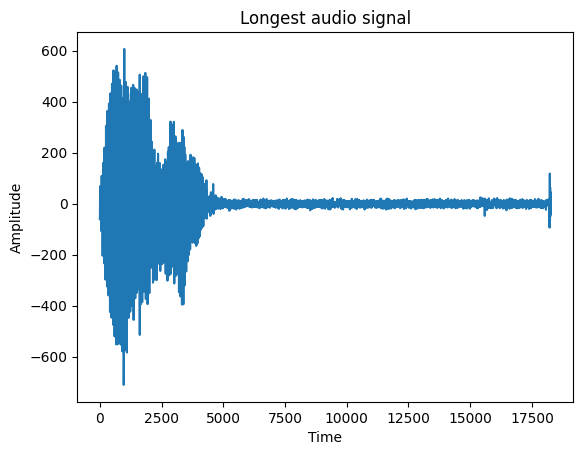

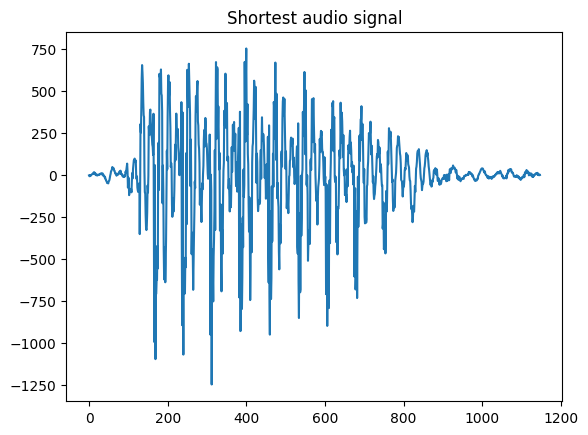

Max sizing before: 18262
Max sizing after: 6457


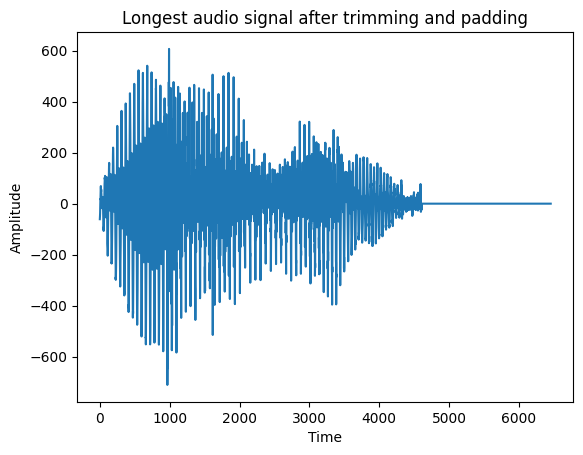

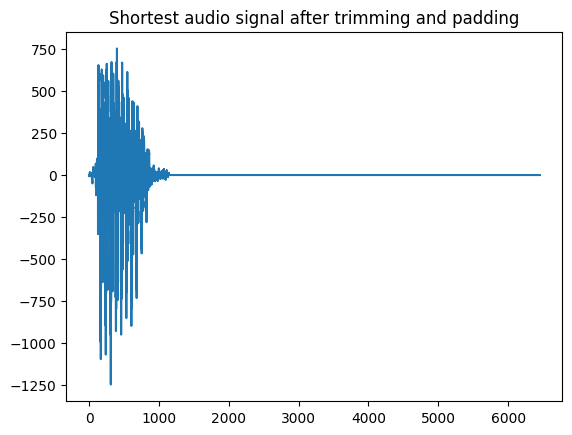

In [10]:
longest_audio = np.argmax([len(x) for x in X])
plt.plot(X[longest_audio])
plt.title("Longest audio signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

display(ipd.Audio(X[longest_audio], rate=rate))

shortest_audio = np.argmin([len(x) for x in X])
plt.plot(X[shortest_audio])
plt.title("Shortest audio signal")
plt.show()

display(ipd.Audio(X[shortest_audio], rate=rate))


max_size = 0
for x in X:
    max_size = max(max_size, x.shape[0])
    
print('Max sizing before:', max_size)

# trim silence
X = [ remove_silence(x) for x in X ]


# add padding to max size
max_size = 0
for x in X:
    max_size = max(max_size, x.shape[0])
    
print('Max sizing after:', max_size)
    
X = [ np.pad(x, (0, max_size - x.shape[0])) for x in X ]

plt.plot(X[longest_audio])
plt.title("Longest audio signal after trimming and padding")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

display(ipd.Audio(X[longest_audio], rate=rate))

plt.plot(X[shortest_audio])
plt.title("Shortest audio signal after trimming and padding")
plt.show()

display(ipd.Audio(X[shortest_audio], rate=rate))